# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [1]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint, pickle
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True) 
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')

syst = platform.system()
if syst == 'Windows':
    dataset_path = "E:/git_projs/MRCNN3/train_newshapes/"
elif syst == 'Linux':
    dataset_path = "/home/kbardool/mrcnn3/train_newshapes/"
else :
    raise Error('unrecognized system ') 
    
import mrcnn.visualize as visualize
import mrcnn.utils     as utils
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_training_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

Using TensorFlow backend.


Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


In [7]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs 2 " 
input_parms +=" --steps_in_epoch  16 "    
input_parms +=" --val_steps        5 " 
input_parms +=" --last_epoch       0 "
input_parms +=" --batch_size       4 "
input_parms +=" --lr          0.0001 "
# input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
# input_parms +="--fcn_logs_dir   train_fcn8_l2_newshapes "
# input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
input_parms +=" --mrcnn_logs_dir    train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir      train_fcn8L2_BCE_M2   "
input_parms +="--fcn_bce_loss_method    2  " 
input_parms +="--fcn_bce_loss_class     3  "
input_parms +="--fcn_losses      fcn_BCE_loss "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor     1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             3
   fcn_bce_loss_method            2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE_M2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 16
   sysout                         SCREEN
   val_steps                      5




In [8]:
# del mrcnn_model, fcn_model
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)

MODE IS: training

   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             3
   fcn_bce_loss_method            2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE_M2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 16
   sysout                         SCREEN
   val_steps                

    Weights file loaded: /home/kbardool/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000/mrcnn_0472.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             3
   fcn_bce_loss_method            2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE_M2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt      

    alt_scores_2                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_2(scattered)        :  shape: (4, 7, 32, 3)         KB.shape:(4, 7, 32, 3)         Keras Tensor: False
    alt_scores_2_norm(by_class)    :  shape: (4, 7, 32, 3)         KB.shape:(4, 7, 32, 3)         Keras Tensor: False
    alt_scores_2_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    fcn_scores_dense               :  shape: (?, 23)               KB.shape:(None, 23)            Keras Tensor: False
    seq_ids                        :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    sscatter_ids                   :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    fcn_scores_by_class            :  shape: (4, 7, 32, 23)        KB.shape:(4, 7, 32, 23)        Keras Tensor: False
    complete                       

 
-----------------

 index:  0    input name : input_image_meta_1:0                       Type: float32           Shape: (?, ?)
 index:  1    input name : input_pr_hm_norm:0                         Type: float32           Shape: (?, 128, 128, 7)
 index:  2    input name : input_pr_hm_scores:0                       Type: float32           Shape: (?, 7, 32, 23)
 index:  3    input name : input_gt_hm_norm:0                         Type: float32           Shape: (?, 128, 128, 7)
 index:  4    input name : input_gt_hm_scores:0                       Type: float32           Shape: (?, 7, 32, 23)
 Outputs:
 --------
 layer:  0    output name: fcn_heatmap_lambda/fcn_hm:0                Type: float32           Shape: (?, 128, 128, 7)
 layer:  1    output name: fcn_softmax_lambda/fcn_sm:0                Type: float32           Shape: (?, 128, 128, 7)
 layer:  2    output name: fcn_MSE_loss/fcn_MSE_loss:0                Type: float32           Shape: (1, 1)
 layer:  3    output name: fcn_BCE_loss/fcn_BCE_loss:0      

# Define training datasets

In [4]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
# dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 10000, generator=True)
# dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  2500, generator=True)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_train, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_val, outfile)

## -- OR --

with open(os.path.join(dataset_path, 'newshapes_training_dataset_10000_A.pkl'), 'rb') as outfile:
    dataset_train = pickle.load(outfile)
with open(os.path.join(dataset_path, 'newshapes_validation_dataset_2500_A.pkl'), 'rb') as outfile:
    dataset_val = pickle.load(outfile)
## If we desire a generator, here it is:    
## train_generator = data_generator(dataset_train, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
## val_generator = data_generator(dataset_val, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
class_names = dataset_train.class_names
# dataset_train.display_active_classes()
print(mrcnn_model.config.BATCH_SIZE, fcn_model.config.BATCH_SIZE)
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

2 2
10000 2500


###  Display some images from training and val datasets

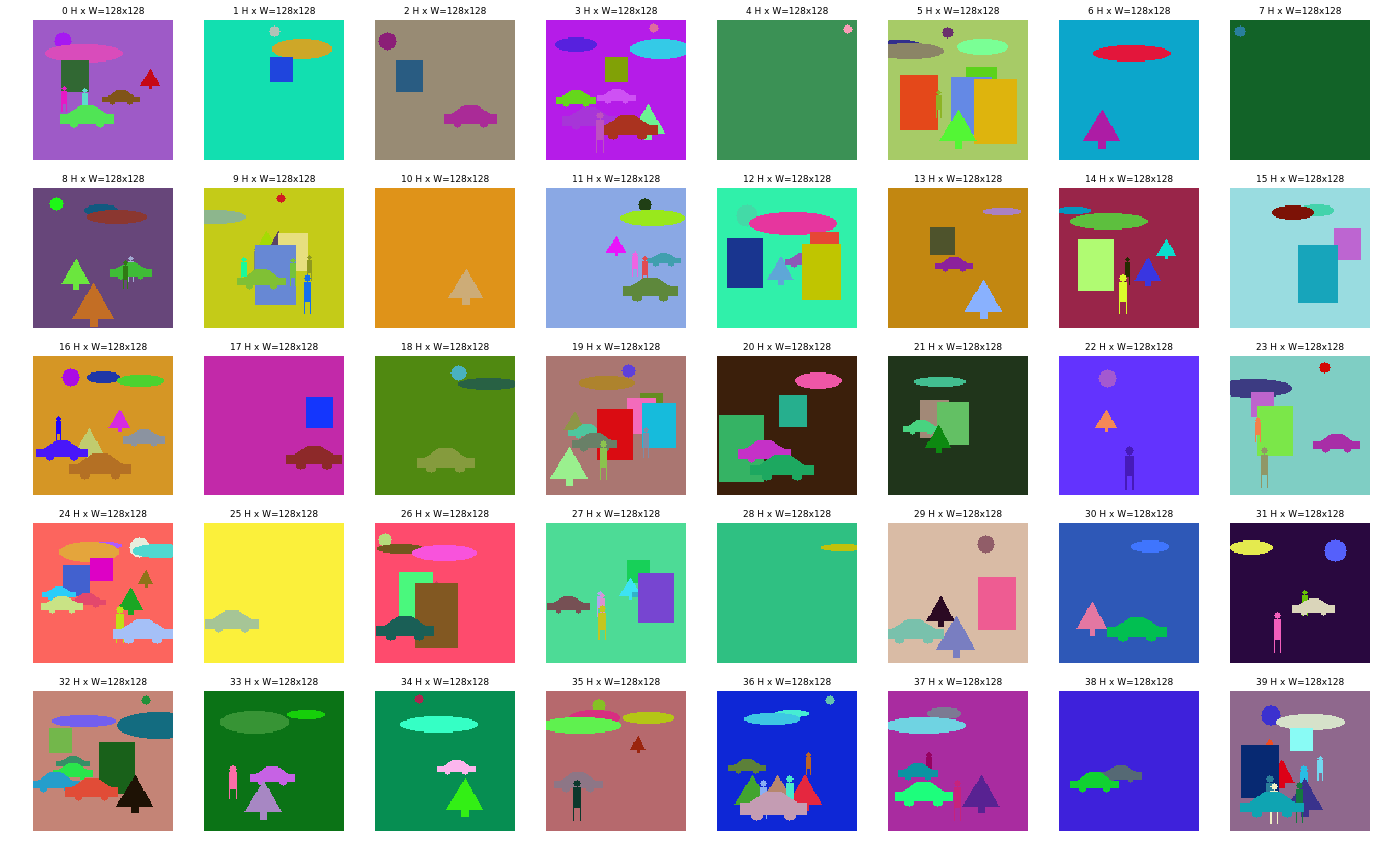

In [8]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_train, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

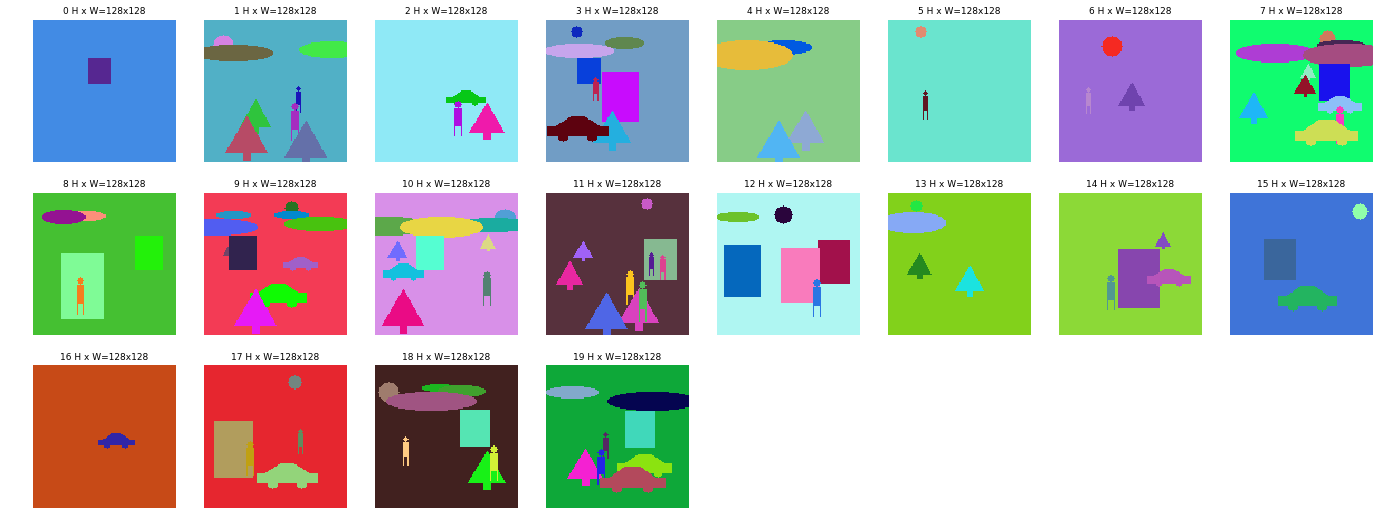

In [9]:
image_list = list(range(0,20))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_val, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

###  Print model layer and weight information

In [ ]:
fcn_model.keras_model.summary()
tr_ly = fcn_model.get_trainable_layers()
for i in tr_ly:
    print(i.name)

In [ ]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

In [ ]:
# model.keras_model.losses
# print(model.keras_model.metrics_names)
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

# Display Images

### Load a specific image using image_id  with Ground Truth bounding boxes and masks

In [ ]:
# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [417])
# visualize.display_training_batch(dataset_train, train_batch_x)


image id :  646
 Image_id    :  646  Reference:  [('sun', (17, 87, 183), (99, 10, 5, 5))] Coco Id: 646
 Image meta  :  [646 128 128   3   0   0 128 128]
 Class ids   :  (1,)    [3]
 Class Names :  ['sun']


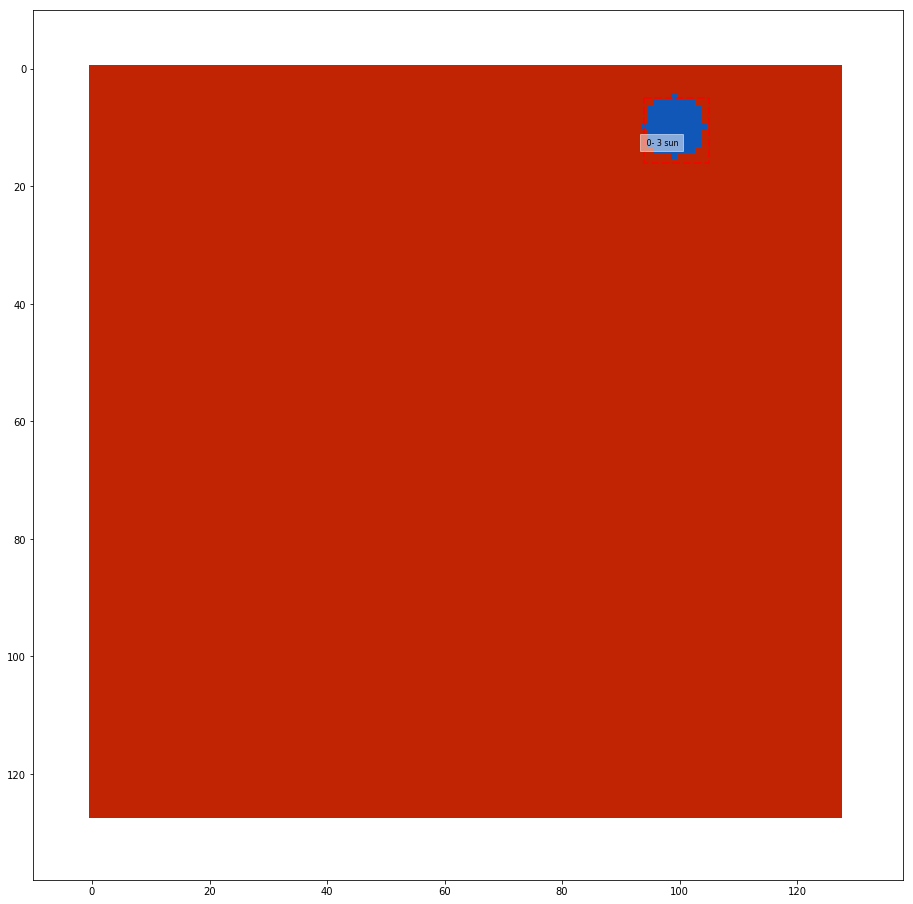

[646 128 128   3   0   0 128 128   1   1   1   1   1   1   1]


In [6]:
IMAGE_IDS = [646]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)
print(train_batch_x[1][0])

### Get training batch using generator and display 

In [ ]:
train_batch_x, train_batch_y = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

# Call `train_in_batches()`

In [5]:
# mrcnn_model.config.display()
fcn_model.config.display()


Configuration Parameters:
-------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_MOMENTUM                 0.9
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CHECKPOINT_PERIOD              1
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /home/kbardool/models_newshapes
EARLY_STOP_MIN_DELTA           1e-07
EARLY_STOP_PATIENCE            500
EPOCHS_TO_RUN                  2
FCN_BCE_LOSS_CLASS             3
FCN_BCE_LOSS_METHOD            2
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 2
IMAGE_BUFFER                   20
IMAG

In [9]:
fcn_model.config.LAST_EPOCH_RAN  =  0
fcn_model.config.EPOCHS_TO_RUN   =  20
fcn_model.config.REDUCE_LR_PATIENCE = 200
# fcn_model.config.LEARNING_RATE   = 1.0e-6
# fcn_model.config.STEPS_PER_EPOCH = 10
# fcn_model.config.SYSOUT = 'screen'

print('    last epoch ran  : ',fcn_model.config.LAST_EPOCH_RAN)
print('    epochs to run   : ',fcn_model.config.EPOCHS_TO_RUN)
print('    steps per epoch : ',fcn_model.config.STEPS_PER_EPOCH)
print('    validation steps: ',fcn_model.config.VALIDATION_STEPS)
print('    learning rate   : ',fcn_model.config.LEARNING_RATE)
print('    momentum        : ',fcn_model.config.LEARNING_MOMENTUM)
print('    weight decay    : ',fcn_model.config.WEIGHT_DECAY)

    last epoch ran  :  0
    epochs to run   :  20
    steps per epoch :  16
    validation steps:  5
    learning rate   :  0.0001
    momentum        :  0.9
    weight decay    :  1e-06


## Call to `train_in_batches()`

In [10]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
##----------------------------------------------------------------------------------------------            
train_layers = ['block1+']   # args.fcn_layers
loss_names   = ['fcn_BCE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names,
            shuffle = False)


['block1+']
['(block1\\_.*)|(block2\\_.*)|(block3\\_.*)|(block4\\_.*)|(block5\\_.*)|(fcn32\\_.*)|(fcn16\\_.*)|(fcn8\\_.*)']
layers regex : (block1\_.*)|(block2\_.*)|(block3\_.*)|(block4\_.*)|(block5\_.*)|(fcn32\_.*)|(fcn16\_.*)|(fcn8\_.*)

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D          

 summary merge all
 
Training Start Parameters:
--------------------------
Starting at epoch     0 of 20 epochs.
Steps per epochs      16 
Last epoch completed  0 
Batch size            4 
Learning Rate         0.0001 
Momentum              0.9 
Weight Decay:         1e-06 
VALIDATION_STEPS      5 
REDUCE_LR_FACTOR      0.5 
REDUCE_LR_COOLDOWN    50 
REDUCE_LR_PATIENCE    200 
MIN_LR                1e-10 
EARLY_STOP_PATIENCE   500 
Checkpoint Path:      /home/kbardool/models_newshapes/train_fcn8L2_BCE_M2/fcn20190131T2039/fcn_{epoch:04d}.h5 
Epoch 1/20
16/16 [==============================] - 45s 3s/step - loss: 0.0193 - fcn_BCE_loss: 0.0104 - val_loss: 0.0145 - val_fcn_BCE_loss: 0.0056

Epoch 00001: val_loss improved from inf to 0.0144731, saving model to /home/kbardool/models_newshapes/train_fcn8L2_BCE_M2/fcn20190131T2039/fcn_0001.h5
Epoch 2/20
16/16 [==============================] - 23s 1s/step - loss: 0.0176 - fcn_BCE_loss: 0.0087 - val_loss: 0.0153 - val_fcn_BCE_loss: 0.0064

Epoc

KeyboardInterrupt: 

In [ ]:
pp.pprint(fcn_model.keras_model._feed_inputs)
pp.pprint(fcn_model.keras_model._feed_targets)
pp.pprint(fcn_model.keras_model._feed_loss_fns)
pp.pprint(fcn_model.keras_model._feed_outputs)
pp.pprint(fcn_model.keras_model._feed_sample_weights)
pp.pprint(fcn_model.keras_model.updates)

import keras.backend as KB
fcn_hm_layer = fcn_model.keras_model.layers[32]
fcn_sp3_layer = fcn_model.keras_model.layers[30]
pp.pprint(fcn_hm_layer.__dict__ )
pp.pprint(fcn_sp3_layer.__dict__)

sess = KB.get_session()
with sess.as_default():
    wght1 = fcn_hm_layer._trainable_weights[0].eval()
    wght2 = fcn_sp3_layer._trainable_weights[0].eval()

print(wght1.shape, wght2.shape)
print(wght1)